## More flexible program to look at surface heterogeneity at different points. 
First focus is on the PERDIGAO campaign, Julio and Rich setting it up as an IOP.  

In [1]:
import xarray as xr 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy

import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util
import matplotlib.patches as mpatches



### Read in surface data

In [2]:
# Read in original surfdata file that's used in SCAM run
surfFile = '/Users/mdfowler/Documents/Analysis/CLASP/surfdata_modified/surfdata_64x128_16pfts_Irrig_CMIP6_simyr2000_c170824.nc'
surfdata = xr.open_dataset(surfFile, engine='netcdf4')

# Pick out a few values - lat, lon, and 
lsmlat = surfdata.LATIXY.values
lsmlon = surfdata.LONGXY.values

# Indices of natural PFTs and crop PFTs (CFTs)
natpft = surfdata.natpft.values
cft    = surfdata.cft.values


## Map out HTG in original file

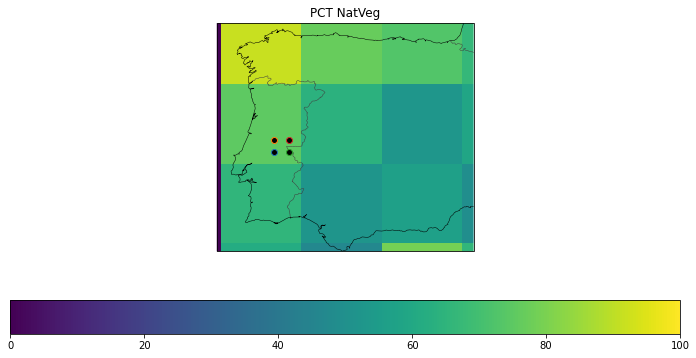

In [17]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-10,-1,36,44], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot of PCT_NATVEG (percentage of each gridcell that's naturally vegetated)
cplot = ax1.pcolormesh(lsmlon,lsmlat,surfdata.PCT_NATVEG.values)
cbar  = plt.colorbar(cplot, orientation='horizontal')
ax1.set_title('PCT NatVeg')

# Add Four points from paper on Perdiago 
ax1.plot(352.01,39.5,'o',markerfacecolor='k',transform=ccrs.PlateCarree())
ax1.plot(352.01,39.9,'o',markerfacecolor='k',transform=ccrs.PlateCarree())

ax1.plot(352.52,39.5,'o',markerfacecolor='k',transform=ccrs.PlateCarree())
ax1.plot(352.52,39.9,'o',markerfacecolor='k',transform=ccrs.PlateCarree())



In [18]:
iopLat = 39.5
iopLon = 352.52

ilat = np.where((lsmlat[:,0]>=iopLat-1.2) & (lsmlat[:,0]<=iopLat+1.2))[0]
ilon = np.where((lsmlon[0,:]>=iopLon-1.2) & (lsmlon[0,:]<=iopLon+1.2))[0]


In [30]:
print('Pct natural vegetation: ', surfdata.PCT_NATVEG.values[ilat,ilon][0])
print('Pct crop: ', surfdata.PCT_CROP.values[ilat,ilon][0])

for iPFT in range(len(surfdata.natpft.values)):
    print('Pct natPFT = %i: %f' % (surfdata.natpft.values[iPFT], surfdata.PCT_NAT_PFT.values[iPFT,ilat,ilon]))

for iPFT in range(len(surfdata.cft.values)):
    print('Pct CFT = %i: %f' % (surfdata.cft.values[iPFT], surfdata.PCT_CFT.values[iPFT,ilat,ilon]))

print('Pct Wetland: ', surfdata.PCT_WETLAND.values[ilat,ilon][0])
print('Pct Lake: ', surfdata.PCT_LAKE.values[ilat,ilon][0])
print('Pct Urban: ', surfdata.PCT_URBAN.values[:, ilat,ilon])   
print('Pct Glacier: ', surfdata.PCT_GLACIER.values[ilat,ilon][0])  



Pct natural vegetation:  75.27919416754581
Pct crop:  17.75202459369134
Pct natPFT = 0: 0.000000
Pct natPFT = 1: 39.630237
Pct natPFT = 2: 0.000000
Pct natPFT = 3: 0.000000
Pct natPFT = 4: 0.000000
Pct natPFT = 5: 0.483734
Pct natPFT = 6: 0.000000
Pct natPFT = 7: 5.472400
Pct natPFT = 8: 0.000000
Pct natPFT = 9: 0.082695
Pct natPFT = 10: 0.352005
Pct natPFT = 11: 0.000000
Pct natPFT = 12: 0.000000
Pct natPFT = 13: 53.896986
Pct natPFT = 14: 0.081943
Pct CFT = 15: 79.274257
Pct CFT = 16: 20.725743
Pct Wetland:  0.0
Pct Lake:  5.000000000000001
Pct Urban:  [[0.        ]
 [0.08503681]
 [1.88374443]]
Pct Glacier:  0.0


Text(0.5, 1.0, 'PCT C3 grass')

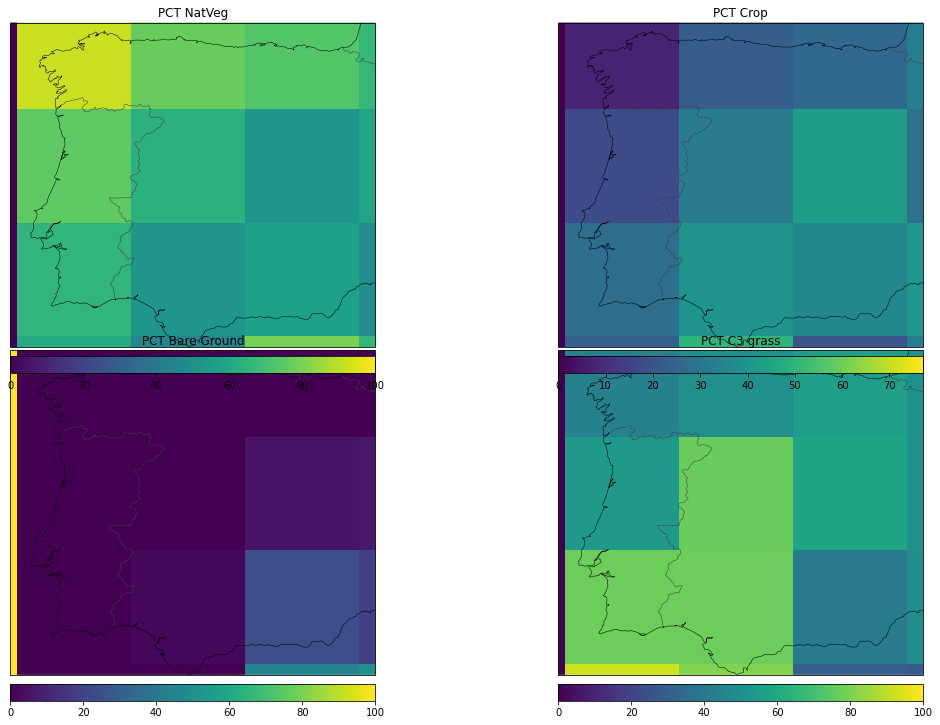

In [11]:
## A few plots to sanity check that this is working...

fig, axs = plt.subplots(2,2, figsize=(18, 12), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
axs = axs.ravel()
fig.subplots_adjust(hspace=0.01)

# Set up maps: extent
axs[0].set_extent([-10,-1,36,44], crs=ccrs.PlateCarree())
axs[1].set_extent([-10,-1,36,44], crs=ccrs.PlateCarree())
axs[2].set_extent([-10,-1,36,44], crs=ccrs.PlateCarree())
axs[3].set_extent([-10,-1,36,44], crs=ccrs.PlateCarree())
# Set up maps: borders+states
axs[0].coastlines(linewidth=0.5,edgecolor='0.25')
axs[1].coastlines(linewidth=0.5,edgecolor='0.25')
axs[2].coastlines(linewidth=0.5,edgecolor='0.25')
axs[3].coastlines(linewidth=0.5,edgecolor='0.25')

#   Only do once: create state lines
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
#   Add those state lines
axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[0].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[1].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[2].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[3].add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plots! 
cplot0 = axs[0].pcolormesh(lsmlon,lsmlat,surfdata.PCT_NATVEG.values)
ax_position = axs[0].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot0, orientation='horizontal',cax=cbar_ax)
axs[0].set_title('PCT NatVeg')

cplot1 = axs[1].pcolormesh(lsmlon,lsmlat,surfdata.PCT_CROP.values)
ax_position = axs[1].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot1, orientation='horizontal',cax=cbar_ax)
axs[1].set_title('PCT Crop')

# Add plot
cplot2 = axs[2].pcolormesh(lsmlon,lsmlat,np.squeeze(surfdata.PCT_NAT_PFT.values[0,:,:]))
ax_position = axs[2].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot2, orientation='horizontal',cax=cbar_ax)
axs[2].set_title('PCT Bare Ground')

# Add plot
cplot3 = axs[3].pcolormesh(lsmlon,lsmlat,np.squeeze(surfdata.PCT_NAT_PFT.values[13,:,:]))
ax_position = axs[3].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot3, orientation='horizontal',cax=cbar_ax)
axs[3].set_title('PCT C3 grass')


